C:\Users\carde\AppData\Local\Temp\ipykernel_7560\2336228611.py:68: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagenes.append(imageio.imread(f"iteracion_{iteracion}.png"))


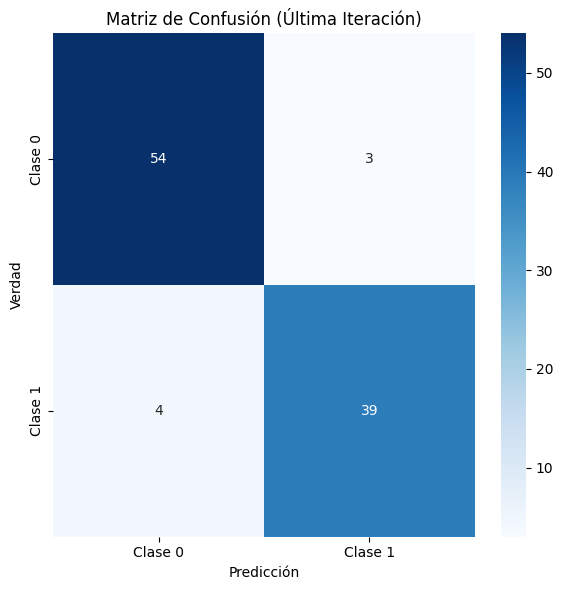

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import imageio  # Para crear el GIF

# Generar 100 puntos aleatorios con etiquetas
np.random.seed(42)  # Para reproducibilidad
n_puntos = 100
X = np.random.rand(n_puntos, 2) * 10  # Puntos en el rango [0, 10]
# Etiquetas: 0 si x1 + x2 < 10, 1 si x1 + x2 >= 10
etiquetas = (X[:, 0] + X[:, 1] >= 10).astype(int)

# Inicialización de pesos y sesgo
w = np.random.rand(2)  # Pesos para x1 y x2
b = np.random.rand()   # Sesgo
tasa_aprendizaje = 0.01

# Función de activación (escalón)
def funcion_activacion(z):
    return 1 if z >= 0 else 0

# Lista para almacenar las imágenes del GIF
imagenes = []

# Fijar límites de los ejes
x_min, x_max = 0, 10
y_min, y_max = 0, 10

# Entrenamiento del perceptrón
n_iteraciones = 100
for iteracion in range(n_iteraciones):
    for i in range(n_puntos):
        x1, x2 = X[i]
        etiqueta = etiquetas[i]
        # Suma ponderada
        z = w[0] * x1 + w[1] * x2 + b
        # Salida del perceptrón
        y = funcion_activacion(z)
        # Actualización de pesos y sesgo
        w[0] += tasa_aprendizaje * (etiqueta - y) * x1
        w[1] += tasa_aprendizaje * (etiqueta - y) * x2
        b += tasa_aprendizaje * (etiqueta - y)
    
    # Crear figura para la iteración actual
    plt.figure(figsize=(6, 6))
    plt.title(f"Iteración {iteracion + 1}", fontsize=16)
    
    # Gráfico de la línea de decisión
    x = np.linspace(x_min, x_max, 100)
    y_linea = (-w[0] * x - b) / w[1]
    plt.scatter(X[:, 0], X[:, 1], c=etiquetas, cmap='bwr')
    plt.plot(x, y_linea, 'g--', label="Línea de decisión")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    
    # Fijar límites de los ejes
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # Guardar la figura en una imagen
    plt.tight_layout()
    plt.savefig(f"iteracion_{iteracion}.png")
    plt.close()
    
    # Agregar la imagen a la lista para el GIF
    imagenes.append(imageio.imread(f"iteracion_{iteracion}.png"))

# Crear un GIF con las imágenes
imageio.mimsave('perceptron_evolucion.gif', imagenes, fps=5)

# Matriz de confusión en la última iteración
predicciones = [funcion_activacion(w[0] * x1 + w[1] * x2 + b) for x1, x2 in X]
matriz_confusion = confusion_matrix(etiquetas, predicciones)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1'], 
            yticklabels=['Clase 0', 'Clase 1'])
plt.title("Matriz de Confusión (Última Iteración)")
plt.xlabel("Predicción")
plt.ylabel("Verdad")
plt.tight_layout()
plt.show()